# Glucose Trends

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
glu = pd.read_csv('data/glu.csv')
glu.head()

,group,time,reltime,act,qty,glu
0,1,2023-02-27T18:43:00Z,-5.0,juice,80,84
1,1,2023-02-27T19:12:00Z,NaN,juice,80,109
2,1,2023-02-27T19:29:00Z,NaN,juice,80,116
3,1,2023-02-27T19:55:00Z,NaN,juice,80,87
4,1,2023-02-27T20:22:00Z,NaN,juice,80,86


In [63]:
#calc.reltime <- function(time, reltime) {
#    ref.idx <- which(!is.na(reltime))
#    ref.time <- time[ref.idx]
#    ref.reltime <- reltime[ref.idx]
#    (time - ref.time) / dminutes() + ref.reltime
#}
def calc_reltime(df):
    ref_idx = np.where(~np.isnan(df['reltime']))[0][0]
    ref_time = df['time'].iloc[ref_idx]
    ref_reltime = df['reltime'].iloc[ref_idx]
    df['reltime'] = (pd.to_datetime(df['time']) - pd.to_datetime(ref_time)) / pd.Timedelta(minutes=1) + ref_reltime
    return df
glu = glu.groupby('group', group_keys=False).apply(calc_reltime)

<Axes: title={'center': 'glucose trend'}, xlabel='reltime', ylabel='glu'>

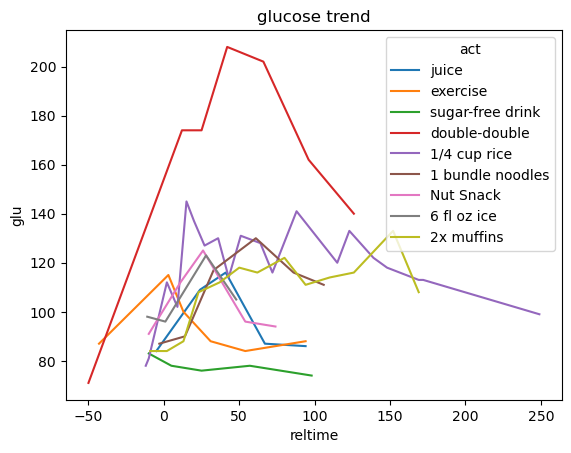

In [64]:
# make a line plot grouped by group and colored by act
ax1 = plt.subplot(1, 1, 1)
ax1.set_title('glucose trend')
sns.lineplot(x='reltime', y='glu', hue='act', data=glu, ax=ax1, markers=True, dashes=False)